In [1]:
#The Imports
#from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
%matplotlib inline

In [2]:
#Setting Start and end dates
#start = datetime.datetime(2006, 1, 1)
#end = datetime.datetime(2016, 1, 1)
bank_stocks = pd.read_pickle('all_banks') 

bank_stocks.head()

Bank Ticker    BAC                                     C                       \
Stock Info    Open   High    Low  Close    Volume   Open   High    Low  Close   
Date                                                                            
2006-01-03   46.92  47.18  46.15  47.08  16296700  490.0  493.8  481.1  492.9   
2006-01-04   47.00  47.24  46.45  46.58  17757900  488.6  491.0  483.5  483.8   
2006-01-05   46.58  46.83  46.32  46.64  14970900  484.4  487.8  484.0  486.2   
2006-01-06   46.80  46.91  46.35  46.57  12599800  488.8  489.0  482.0  486.2   
2006-01-09   46.72  46.97  46.36  46.60  15620000  486.0  487.4  483.0  483.9   

Bank Ticker             ...        MS                                  WFC  \
Stock Info    Volume    ...      Open   High    Low  Close   Volume   Open   
Date                    ...                                                  
2006-01-03   1537660    ...     57.17  58.49  56.74  58.31  5377000  31.60   
2006-01-04   1871020    ...     58.70  59.28  58.35  58.35  7977800  31.80   
2006-01-05   1143160    ...     58.55  58.59  58.02  58.51  5778000  31.50   
2006-01-06   1370250    ...     58.77  58.85  58.05  58.57  6889800  31.58   
2006-01-09   1680740    ...     58.63  59.29  58.62  59.19  4144500  31.68   

Bank Ticker                                 
Stock Info    High    Low  Close    Volume  
Date                                        
2006-01-03   31.98  31.20  31.90  11016400  
2006-01-04   31.82  31.36  31.53  10871000  
2006-01-05   31.56  31.31  31.50  10158000  
2006-01-06   31.78  31.38  31.68   8403800  
2006-01-09   31.82  31.56  31.68   5619600  

[5 rows x 30 columns]

In [3]:
#Create a list of the ticker symbols (as strings) in alphabetical order. Call this list: tickers
tickers = [ 'BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

In [4]:
tickers

['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

In [5]:
#Use pd.concat to concatenate the bank dataframes together to a single data frame called bank_stocks.
#Set the keys argument equal to the tickers list. Also pay attention to what axis you concatenate on.
#bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC ], axis=1,keys=tickers )

In [6]:
#bank_stocks.columns.names = ['Bank Ticker','Stock Info']
#bank_stocks.head()

In [7]:
#bank_stocks[bank_stocks["Close"]]
#for i in tickers:
#bank_stocks.xs("BAC", axis=1, )['Close'].max()

bank_stocks.xs(key='Close', axis=1, level="Stock Info").max()

Bank Ticker
BAC     54.90
C      564.10
GS     247.92
JPM     70.08
MS      89.30
WFC     58.52
dtype: float64

In [8]:
#** Create a new empty DataFrame called returns. 
#This dataframe will contain the returns for each bank's stock. returns are typically defined by:
#$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [9]:
returns = pd.DataFrame()

In [10]:
#We can use pandas pct_change() method on the Close column to create a column representing this return value.
#Create a for loop that goes and for each Bank Stock Ticker
#creates this returns column and set's it as a column in the returns DataFrame.

In [11]:
for i in tickers:
    returns[i + ' Return'] = bank_stocks[i]['Close'].pct_change()

In [12]:
returns.head()

BAC Return  C Return  GS Return  JPM Return  MS Return  WFC Return
Date                                                                          
2006-01-03         NaN       NaN        NaN         NaN        NaN         NaN
2006-01-04   -0.010620 -0.018462  -0.013812   -0.014183   0.000686   -0.011599
2006-01-05    0.001288  0.004961  -0.000393    0.003029   0.002742   -0.000951
2006-01-06   -0.001501  0.000000   0.014169    0.007046   0.001025    0.005714
2006-01-09    0.000644 -0.004731   0.012030    0.016242   0.010586    0.000000

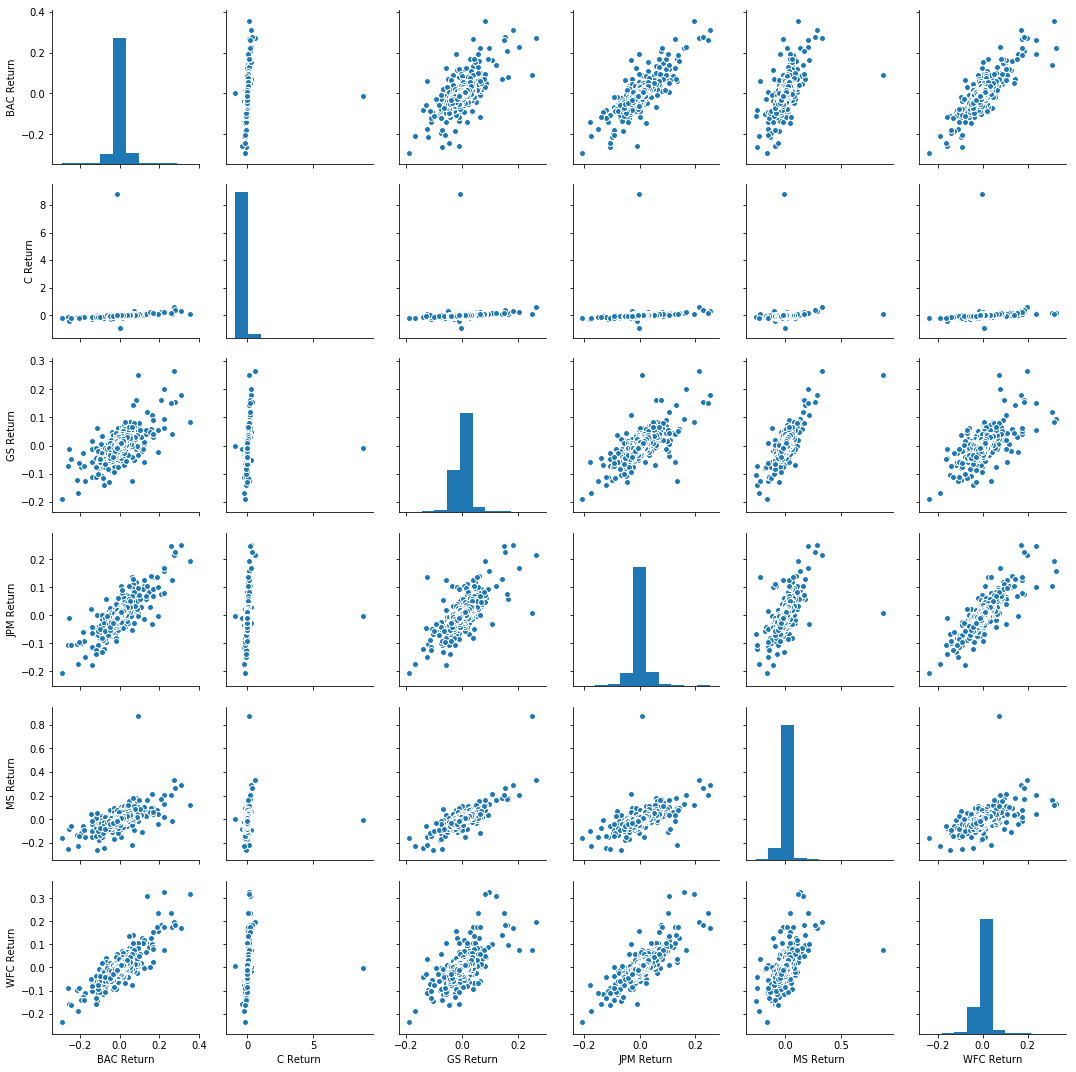

In [13]:
#Create a pairplot using seaborn of the returns dataframe. What stock stands out to you? Can you figure out why?
import seaborn as sns
sns.pairplot( returns[1:] )

In [14]:
#Using this returns DataFrame, figure out on what dates each bank stock had the best and worst single day returns.
#You should notice that 4 of the banks share the same day for the worst drop, did anything significant happen that day?

In [15]:
returns.idxmin()

BAC Return   2009-01-20
C Return     2011-05-06
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

In [16]:
returns.idxmax()

BAC Return   2009-04-09
C Return     2011-05-09
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

In [17]:
#Take a look at the standard deviation of the returns, which stock would you classify 
#as the riskiest over the entire time period? 
#Which would you classify as the riskiest for the year 2015?
returns.std()

BAC Return    0.036650
C Return      0.179969
GS Return     0.025346
JPM Return    0.027656
MS Return     0.037820
WFC Return    0.030233
dtype: float64

In [18]:
returns['2015'].std() #Ms was riskiest?

BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WFC Return    0.012591
dtype: float64

In [19]:
#Create a distplot using seaborn of the 2015 returns for Morgan Stanley

In [20]:
#returns['2015'].loc(returns['MS Return'])
returns['MS Return']['2015']

Date
2015-01-02   -0.002320
2015-01-05   -0.031258
2015-01-06   -0.028800
2015-01-07    0.014278
2015-01-08    0.014889
2015-01-09   -0.016271
2015-01-12   -0.013829
2015-01-13   -0.009348
2015-01-14   -0.022759
2015-01-15   -0.017893
2015-01-16    0.008965
2015-01-20   -0.004013
2015-01-21   -0.000576
2015-01-22    0.023035
2015-01-23   -0.010695
2015-01-26   -0.001138
2015-01-27   -0.012817
2015-01-28   -0.025678
2015-01-29    0.017767
2015-01-30   -0.016293
2015-02-02    0.018042
2015-02-03    0.018013
2015-02-04   -0.007705
2015-02-05    0.004602
2015-02-06    0.024621
2015-02-09   -0.004471
2015-02-10    0.014875
2015-02-11    0.005808
2015-02-12    0.014572
2015-02-13   -0.003252
                ...   
2015-11-18    0.019649
2015-11-19   -0.002336
2015-11-20   -0.007609
2015-11-23   -0.007962
2015-11-24   -0.001486
2015-11-25    0.000595
2015-11-27    0.005058
2015-11-30    0.015394
2015-12-01    0.028280
2015-12-02   -0.010774
2015-12-03   -0.012611
2015-12-04    0.025254
2015-1

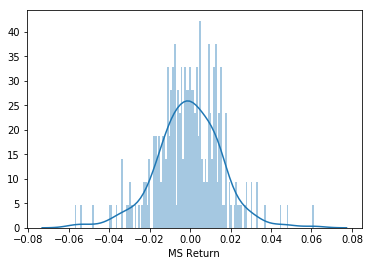

In [21]:
sns.distplot(returns['MS Return']['2015'], bins=140)

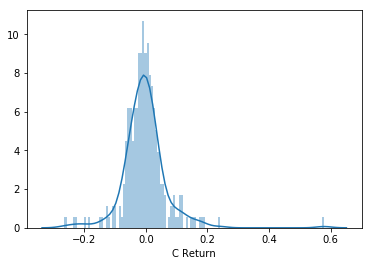

In [22]:
#Create a distplot using seaborn of the 2008 returns for CitiGroup
sns.distplot(returns['C Return']['2008'], bins=120 )

In [23]:
#____
# More Visualization

#A lot of this project will focus on visualizations. Feel free to use any of your preferred visualization libraries to try to recreate the described plots below, seaborn, matplotlib, plotly and cufflinks, or just pandas.

### Imports

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

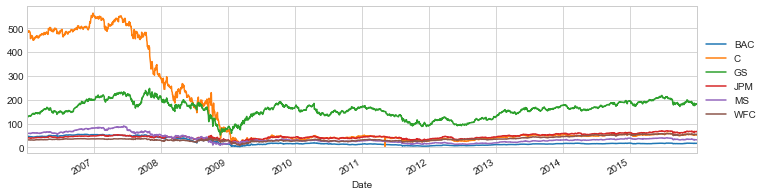

In [25]:
#Create a line plot showing Close price for each bank for the entire index of time. 
#(Hint: Try using a for loop, 
#or use [.xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html) 
#to get a cross section of the data.)**
for i in tickers:
  bank_stocks[i]['Close'].plot.line( figsize=(12, 3), label=i )
plt.legend( loc='center left', bbox_to_anchor=(1.0, 0.5))

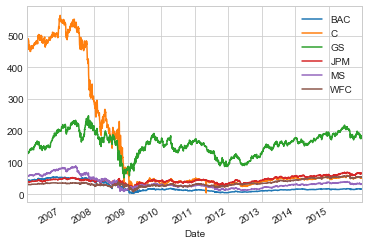

In [26]:
for i in tickers:
  bank_stocks[i]['Close'].plot.line(label=i )
plt.legend()

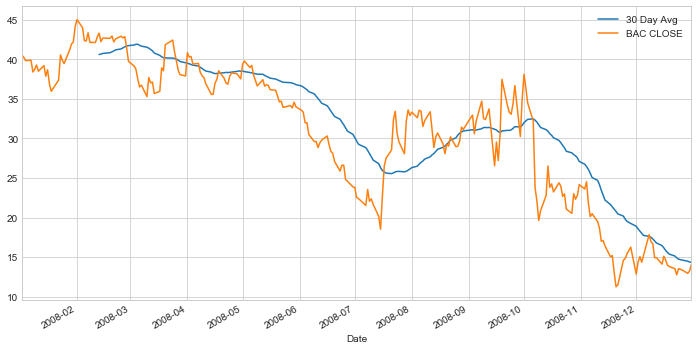

In [27]:
### Moving Averages
#Let's analyze the moving averages for these stocks in the year 2008. 
#Plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008
#bank_stocks['BAC']['Close'].plot.line( label=i )


plt.figure(figsize=(12,6))
bank_stocks['BAC']['Close'].loc['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label='30 Day Avg')
bank_stocks['BAC']['Close'].loc['2008-01-01':'2009-01-01'].plot(label='BAC CLOSE')
plt.legend()

In [29]:
# plotly
bank_stocks.xs(key='Close',axis=1,level='Stock Info').iplot()

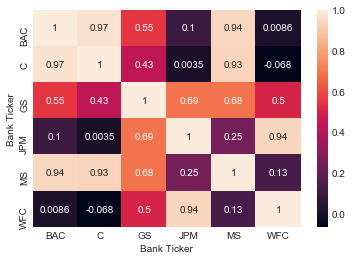

In [30]:
#Create a heatmap of the correlation between the stocks Close Price.
sns.heatmap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

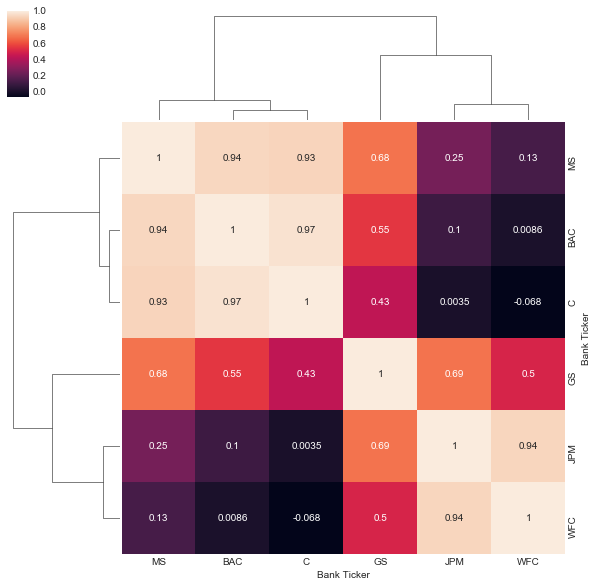

In [31]:
#Optional: Use seaborn's clustermap to cluster the correlations together:
sns.clustermap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

In [32]:
close_corr = bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr()
close_corr.iplot(kind='heatmap',colorscale='rdylbu')

In [37]:
## Part 2 (Optional)

#In this second part of the project we will rely on the cufflinks library to create some Technical Analysis plots. 
#This part of the project is experimental due to its heavy reliance on the cuffinks project, 
#so feel free to skip it if any functionality is broken in the future.

bank_stocks['BAC'][['Open', 'High', 'Low', 'Close']].loc['2015-01-01':'2016-01-01'].iplot(kind='candle')

In [39]:
#Use .ta_plot(study='sma') to create a Simple Moving Averages plot of Morgan Stanley for the year 2015.
bank_stocks['MS']['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='sma',periods=[13,21,55],title='Simple Moving Averages')

In [ ]:
#Use .ta_plot(study='boll') to create a Bollinger Band Plot for Bank of America for the year 2015.